# Overview

The dataset contains detailed information on cars collected from CarDekho, an online platform for buying and selling vehicles. The data includes various attributes such as the car name, year of manufacture, selling price, kilometers driven, fuel type, seller type, transmission type, and the number of previous owners. This comprehensive dataset provides valuable insights into the car market, helping users understand trends and make informed decisions.

Car name: The specific name or model of the car

Year: The year the car was manufactured or first registered.

Selling Price: The price at which the car is being sold.

Kms driven: The total distance the car has been driven, measured in kilometers.

Fuel: The type of fuel the car uses 

Seller type: Indicates whether the seller is a dealer, an individual or trust mark dealer

Transmission: The type of transmission system in the car (manual or automatic).

Owner: The number of previous owners of the car.

# Objectives

To determine the distribution of car models by counting the occurrences of each car name in the dataset

To analyze the distribution of seller types by counting the number of cars sold by dealers versus individuals.

To count the occurrences of different transmission types (manual vs. automatic) in the dataset.

To analyze the number of previous owners for each car by counting the occurrences of different owner counts.


In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing dataset from a csv file
CarDetails= pd.read_csv("Car Details.csv")


In [3]:
CarDetails.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
# renaming the update_year to year && runtime to duration of the movie
CarDetails = CarDetails.rename(columns={'name': 'Name'})
CarDetails = CarDetails.rename(columns={'year': 'Year'})
CarDetails = CarDetails.rename(columns={'selling_price': 'Selling_price'})
CarDetails = CarDetails.rename(columns={'km_driven': 'KM_Driven'})
CarDetails = CarDetails.rename(columns={'fuel': 'Fuel'})
CarDetails = CarDetails.rename(columns={'seller_type': 'Seller_type'})
CarDetails = CarDetails.rename(columns={'transmission': 'Transmission'})
CarDetails = CarDetails.rename(columns={'owner': 'Owner'})



In [9]:
#Check for duplicate entries
CarDetails[CarDetails.duplicated()]

,Name,Year,Selling_price,KM_Driven,Fuel,Seller_type,Transmission,Owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [85]:
CarDetails.tail()

,Name,Year,Selling_price,KM_Driven,Fuel,Seller_type,Transmission,Owner,name_2,car_name
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Hyundai
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner,Renault,Renault


In [10]:
# checking DataTypes

CarDetails.dtypes

Name             object
Year              int64
Selling_price     int64
KM_Driven         int64
Fuel             object
Seller_type      object
Transmission     object
Owner            object
dtype: object

In [11]:
#Summary Statistics on the dataset
CarDetails.describe()

,Year,Selling_price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
# Check for blank rows
CarDetails = CarDetails.dropna(how='any') 

print(CarDetails)

                                     Name  Year  Selling_price  KM_Driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        Fuel Seller_type Transmission         Owner  
0     Petrol  Individ

In [74]:
CarDetails["car_name"] = CarDetails.Name.apply(lambda x : ' '.join(x.split(' ')[:1]))
CarDetails['car_name']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: car_name, Length: 4340, dtype: object

In [75]:
CarDetails.car_name.value_counts()

car_name
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

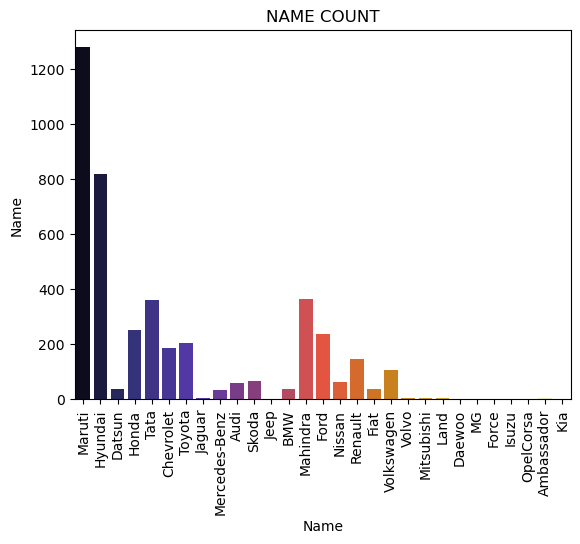

In [76]:
sns.countplot(data=CarDetails,x="car_name",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black")
plt.ylabel("Name",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
plt.show()


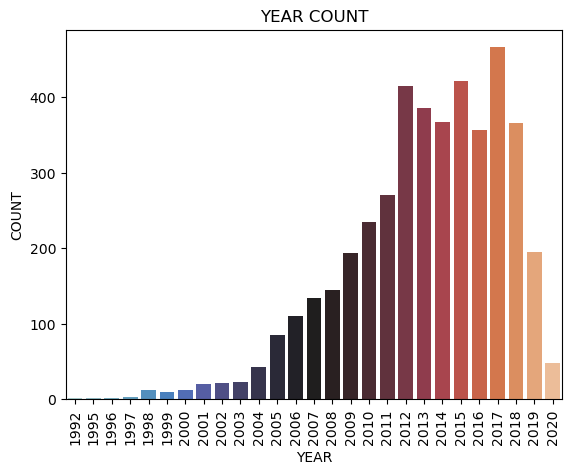

In [84]:
sns.countplot(data=CarDetails,x="Year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="BLACK")
plt.ylabel("COUNT",fontsize=10,color="BLACK")
plt.title("YEAR COUNT",color="BLACK")
plt.show()

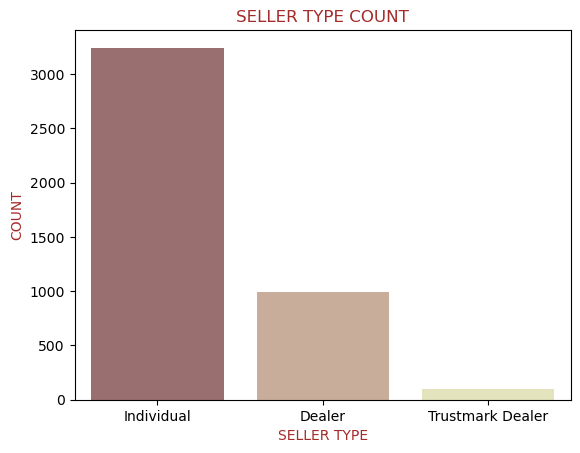

In [22]:
sns.countplot(data=CarDetails,x="Seller_type",palette="pink")
plt.xlabel("SELLER TYPE",fontsize=10,color="brown")
plt.ylabel("COUNT",fontsize=10,color="brown")
plt.title("SELLER TYPE COUNT",color="brown")
plt.show()

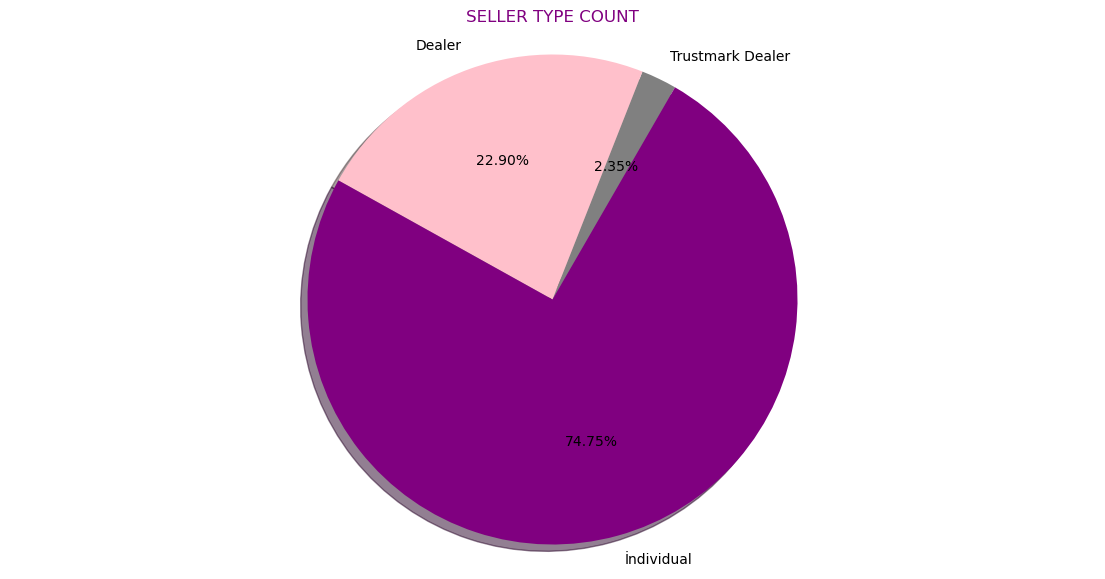

In [73]:
plt.figure(figsize=(14, 7))
labels=["Trustmark Dealer","Dealer","İndividual"]
plt.pie(CarDetails['Seller_type'].value_counts().sort_values(),labels=labels,explode=[0,0,0],
        autopct='%1.2f%%',colors=['gray','PINK',"PURPLE"], startangle=60,shadow=True)
plt.title("SELLER TYPE COUNT",color="PURPLE")
plt.axis('equal')
plt.show()

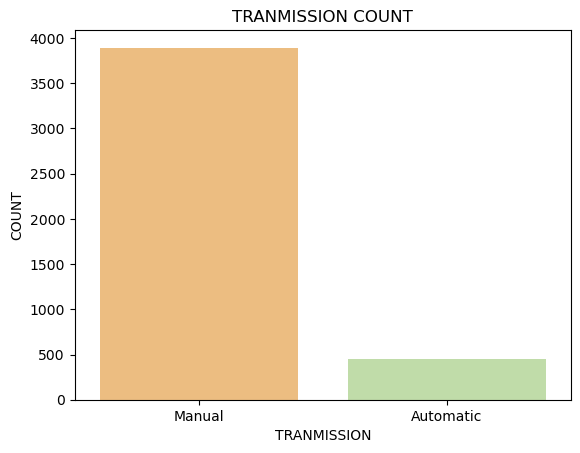

In [63]:
sns.countplot(data=CarDetails,x="Transmission",palette="Spectral")
plt.xlabel("TRANMISSION",fontsize=10,color="BLACK")
plt.ylabel("COUNT",fontsize=10,color="BLACK")
plt.title("TRANMISSION COUNT",color="BLACK")
plt.show()

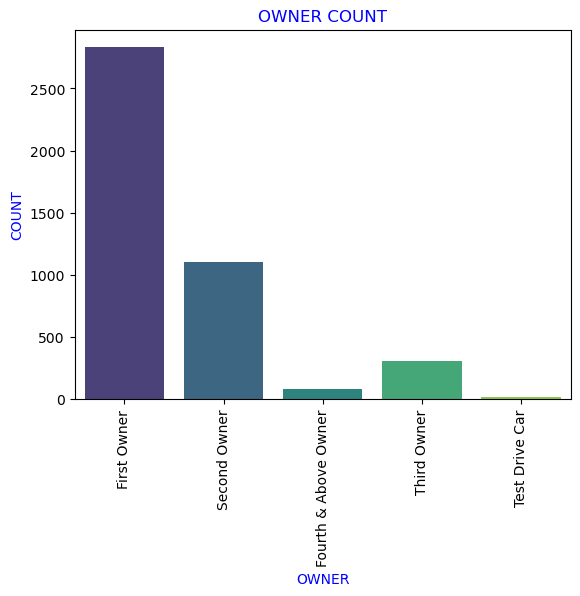

In [82]:
sns.countplot(data=CarDetails,x="Owner",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("OWNER",fontsize=10,color="blue")
plt.ylabel("COUNT",fontsize=10,color="blue")
plt.title("OWNER COUNT",color="blue")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [31]:
# 1. Separate your data into predictor variables (X) and target variable (y
X = CarDetails.loc[:, ["Name", "Year","KM_Driven","Fuel","Seller_type","Transmission","Owner"]]
y = CarDetails['Selling_price']

In [47]:
model = LogisticRegression()

In [52]:
model.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.995


# CONCLUSION

The best-selling car is the Maruti, followed by Hyundai. Most cars are usually manual transmission. The majority of sales are made by individual sellers. The most sales were made in 2017, indicating a high level of production during that year.



In [79]:
# Saving to an excel sheet
CarDetails.to_excel("cleaned CarDetails.xlsx",  sheet_name='Car details', 
             na_rep='N/A', 
             float_format='%.1f', 
             columns=list(CarDetails.columns), 
             header=True, 
             index=False)